In [3]:
import urllib.request
from bs4 import BeautifulSoup

def getUrl (url):

    headers = ('User-Agent',
               "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/77.0.3865.120 Safari/537.36")
    opener = urllib.request.build_opener()
    opener.addheaders = [headers]
    urllib.request.install_opener(opener)
    html = urllib.request.urlopen(url).read().decode('utf-8', 'ignore')
    bs = BeautifulSoup(html,'lxml')
    # 用beautifulsoup的select,找到所有的<a>标签
    links = bs.select('.list04 > li > p > a')
    return links


import sys
if __name__ == '__main__':
    text1 = ''
    for i in range(1,100):
        url = 'https://finance.sina.com.cn/stock/'.format(i)
        linklist = getUrl(url)
        texts = []

        links = []
        for link in linklist:
            texts.append(link.text.strip())
            links.append(link.get('href'))
        for text, link in zip(texts, links):
            text = text.strip().replace("原        \n        ", "")
            text = text.strip().replace("转        \n        ", "")
            text1 += text+'。'
#             data = {'tittle': text, 'link': link}
#             print(data)


Populating the interactive namespace from numpy and matplotlib


(-0.5, 399.5, 199.5, -0.5)

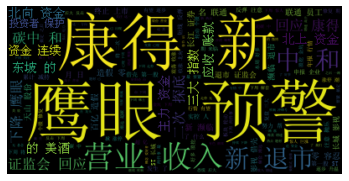

In [8]:
##world cloud 
import jieba
%pylab inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text1 = " ".join(jieba.cut(text1))
wordcloud = WordCloud(font_path="simsun.ttf").generate(text1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")